# League of Legends Diamond Ranked Games (10 min)

- My site [skillcraft](https://skillcraft.codes)
- This dataset [Kaggle](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min)
- Thanks for viewing

Basic Machine Learning


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
import scipy

In [ ]:
df = pd.read_csv('data/high_diamond_ranked_10min.csv')

In [3]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
df.plot

blueAvgLevel                 AxesSubplot(0.125,0.536818;0.352273x0.343182)
blueTotalExperience       AxesSubplot(0.547727,0.536818;0.352273x0.343182)
blueTotalMinionsKilled          AxesSubplot(0.125,0.125;0.352273x0.343182)
dtype: object

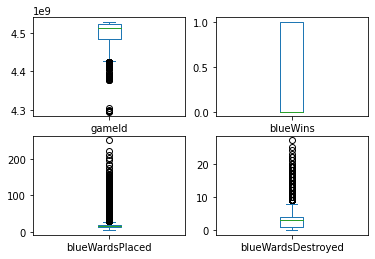

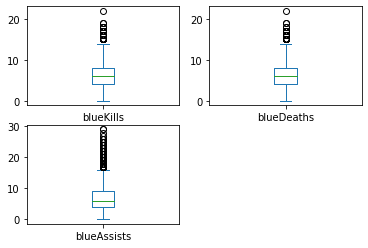

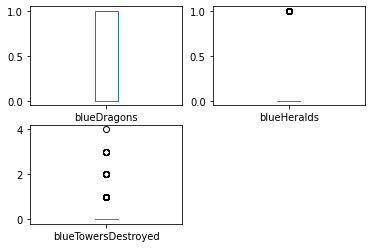

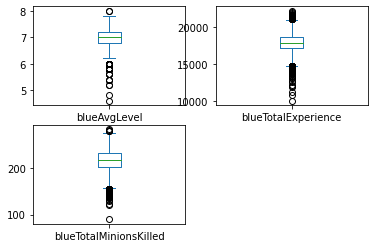

In [30]:
df.iloc[:,0:4].\
    plot(kind='box',
    subplots=True,layout=(2,2),
     sharex=False, sharey=False)

df.iloc[:,5:8].\
    plot(kind='box',
    subplots=True,layout=(2,2),
     sharex=False, sharey=False)

df.iloc[:,9:12].\
    plot(kind='box',
    subplots=True,layout=(2,2),
     sharex=False, sharey=False)

df.iloc[:,13:16].\
    plot(kind='box',
    subplots=True,layout=(2,2),
     sharex=False, sharey=False)

In [9]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [6]:
df.corr()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,...,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,...,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,...,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,...,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,...,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,...,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,...,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,...,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,...,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.008962,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,...,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871


<AxesSubplot:>

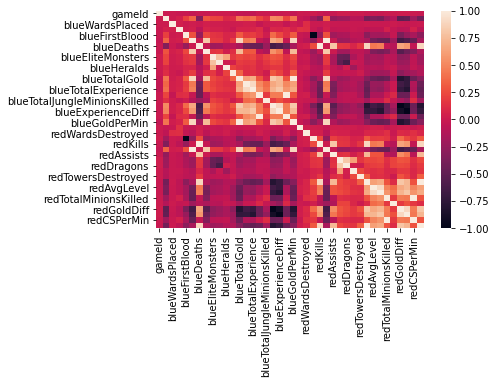

In [10]:
sns.heatmap(df.corr()) 

In [11]:
df[['blueWins','blueDragons']].sum()

blueWins       4930
blueDragons    3576
dtype: int64

In [12]:
print(f"Red Wins: {df[df.blueWins == 0]['blueWins'].count()}");
print(f"Red Dragons: {df['redDragons'].sum()}")

Red Wins: 4949
Red Dragons: 4081


In [13]:
blue = df[['blueDragons','blueWins']].sum()
red = pd.Series([df['redDragons'].sum(),df[df.blueWins == 0]['blueWins'].count()] ,index = ['redDragons', 'redWins'])

In [14]:
pd.crosstab(df['blueDragons'], df['blueWins'])

blueWins,0,1
blueDragons,,
0,3665,2638
1,1284,2292


In [15]:
print(red); print(blue)

redDragons    4081
redWins       4949
dtype: int64
blueDragons    3576
blueWins       4930
dtype: int64


****There's a Correlation Between Winning and Getting The Dragon But There's No Causation.
Since The Difference Between redDragons and blueDragons is Really Huge, However The Difference Between The Wins isn't Much.****

In [16]:
print(f"The Red Team Had More '{red.redDragons - blue.blueDragons}' Dragons More Than The Blue Team"); 
print("However, Getting The Dragon Every Match Won't Lead Your Team Into Winning!");
print(f"Red Team Won '{red.redWins - blue.blueWins}' Matches More Than The Blue Team")

The Red Team Had More '505' Dragons More Than The Blue Team
However, Getting The Dragon Every Match Won't Lead Your Team Into Winning!
Red Team Won '19' Matches More Than The Blue Team


In [17]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
